In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('./diamond.csv')
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641


<Axes: xlabel='certification', ylabel='count'>

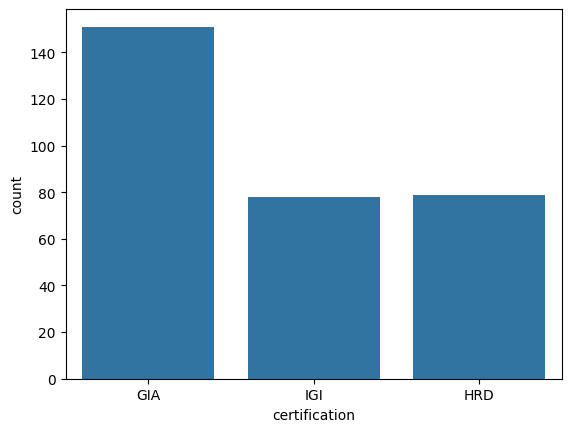

In [3]:
sns.countplot(data = df, x = 'certification')

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
label = LabelEncoder()

In [6]:
df['colour_encoded'] = label.fit_transform(df['colour'])
df['clarity_encoded']= label.fit_transform(df['clarity'])
df['certification_encoded'] = label.fit_transform(df['certification'])

In [7]:
df

,Unnamed: 0,carat,colour,clarity,certification,price,colour_encoded,clarity_encoded,certification_encoded
0,1,0.30,D,VS2,GIA,1302,0,2,0
1,2,0.30,E,VS1,GIA,1510,1,1,0
2,3,0.30,G,VVS1,GIA,1510,3,3,0
3,4,0.30,G,VS1,GIA,1260,3,1,0
4,5,0.31,D,VS1,GIA,1641,0,1,0
...,...,...,...,...,...,...,...,...,...
303,304,1.01,I,VS1,HRD,8175,5,1,1
304,305,1.02,F,VVS2,HRD,10796,2,4,1
305,306,1.06,H,VVS2,HRD,9890,4,4,1
306,307,1.02,H,VS2,HRD,8959,4,2,1


In [8]:
df = df.drop(columns=['Unnamed: 0','colour','clarity','certification'])

In [9]:
df.corr()

,carat,price,colour_encoded,clarity_encoded,certification_encoded
carat,1.000000,0.944727,0.117737,0.230160,-0.380164
price,0.944727,1.000000,-0.078225,0.190961,-0.298092
colour_encoded,0.117737,-0.078225,1.000000,0.037303,0.021678
clarity_encoded,0.230160,0.190961,0.037303,1.000000,-0.049168
certification_encoded,-0.380164,-0.298092,0.021678,-0.049168,1.000000


<Axes: >

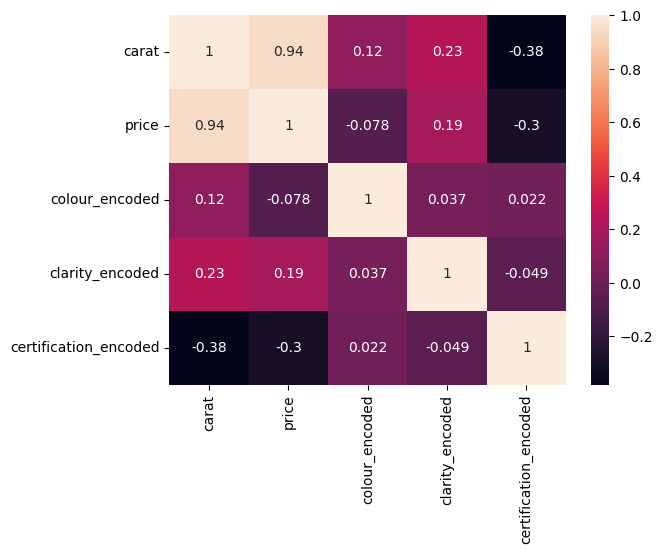

In [10]:
sns.heatmap(df.corr(), annot=True)

In [11]:
df =df.drop(columns=["colour_encoded","clarity_encoded"])

In [12]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df

,carat,price,certification_encoded
0,1.00,8788,1
1,0.31,1126,0
2,0.57,3651,0
3,0.62,5845,0
4,0.36,1485,0
...,...,...,...
303,0.28,1199,2
304,0.71,5193,0
305,0.75,7368,0
306,0.81,7358,1


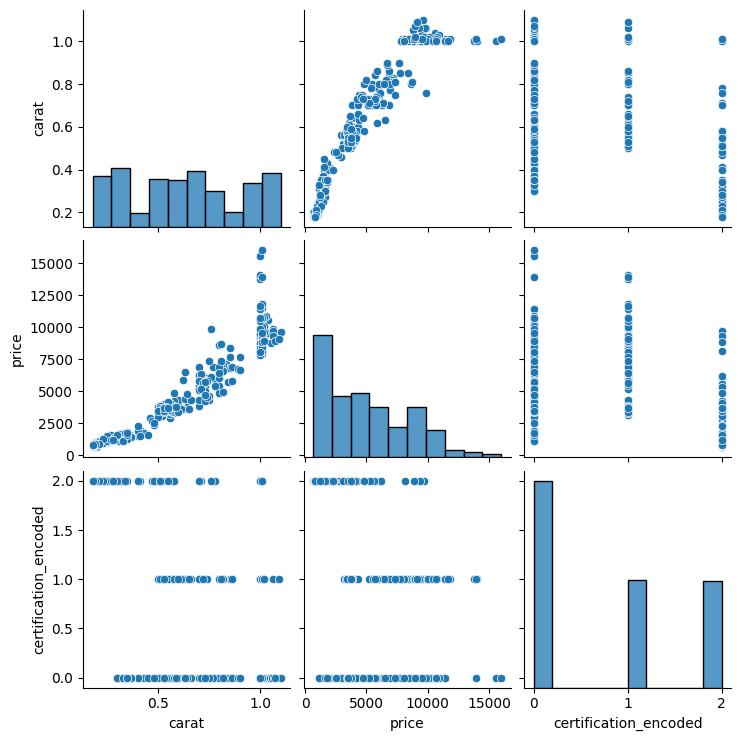

In [13]:
sns.pairplot(df)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df.columns

Index(['carat', 'price', 'certification_encoded'], dtype='object')

In [16]:
X = df.drop(columns='price').values
y = df['price'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scale = MinMaxScaler()

In [20]:
scale.fit(X_train)

MinMaxScaler()

In [21]:
X_train = scale.transform(X_train)

In [22]:
X_test = scale.transform(X_test)

In [23]:
# X_train.min()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model = Sequential()

model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [25]:
model.fit(x=X_train,y=y_train,epochs=400,validation_data=(X_test,y_test))

Epoch 1/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 33903336.0000 - val_loss: 41525484.0000
Epoch 2/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 34697580.0000 - val_loss: 41524700.0000
Epoch 3/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 37146156.0000 - val_loss: 41523844.0000
Epoch 4/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 37347868.0000 - val_loss: 41522820.0000
Epoch 5/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 35758560.0000 - val_loss: 41521360.0000
Epoch 6/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 36532760.0000 - val_loss: 41519268.0000
Epoch 7/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 34132352.0000 - val_loss: 41516552.0000
Epoch 8/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 35943620.0000 - val_loss: 41513052.0000
Epoch 9/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 36018452.0000 - val_loss: 41508752.0000
Epoch 10/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 36382100.0000 - val_loss: 41503456.0000
Epoch 11/400
8/8 ━━

In [26]:
loss_df =pd.DataFrame(model.history.history)
loss_df

,loss,val_loss
0,3.514436e+07,4.152548e+07
1,3.514359e+07,4.152470e+07
2,3.514287e+07,4.152384e+07
3,3.514207e+07,4.152282e+07
4,3.514100e+07,4.152136e+07
...,...,...
395,1.217106e+06,1.100267e+06
396,1.212560e+06,1.089625e+06
397,1.211362e+06,1.089039e+06
398,1.208540e+06,1.088904e+06


<Axes: >

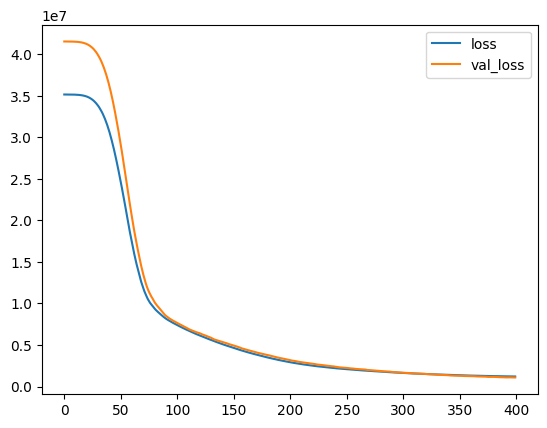

In [27]:
loss_df.plot()

In [28]:
model.evaluate(X_test,y_test,verbose=0)

1086114.0

In [29]:
model.evaluate(X_train,y_train,verbose=0)

1205100.625

In [30]:
predictions = model.predict(X_test)
predictions

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[ 5809.145  ],
       [ 4535.557  ],
       [ 1381.2438 ],
       [ 1381.2438 ],
       [ 5797.4946 ],
       [ 9239.14   ],
       [ 3629.436  ],
       [ 7185.803  ],
       [ 1541.3169 ],
       [ 1781.4266 ],
       [ 2367.4995 ],
       [ 9250.79   ],
       [ 1141.1339 ],
       [ 3503.0635 ],
       [  685.8546 ],
       [ 1910.869  ],
       [ 1379.0001 ],
       [ 1910.869  ],
       [ 3744.1577 ],
       [ 9250.79   ],
       [ 9239.14   ],
       [ 9239.14   ],
       [ 4179.7417 ],
       [ 5682.7725 ],
       [ 5809.145  ],
       [ 9124.417  ],
       [ 3858.8794 ],
       [ 9480.233  ],
       [ 7403.5957 ],
       [ 6944.709  ],
       [  685.8546 ],
       [ 9812.747  ],
       [ 1582.7146 ],
       [ 1692.0992 ],
       [ 2941.1072 ],
       [ 3732.5063 ],
       [ 5912.216  ],
       [ 2023.3347 ],
       [ 9365.511  ],
       [  685.8546 ],
       [ 9250.79   ],
       [ 3629.436  ],
       [ 9250.79   ],
       [ 9239.14   ],
       [ 9250.79   ],
       [  

In [31]:
from sklearn.metrics import explained_variance_score

In [32]:
from sklearn.metrics import r2_score,accuracy_score

In [33]:
r2_score(y_test,predictions)

0.9128599166870117

In [34]:
explained_variance_score(y_test,predictions) 

0.9136728334203618